In [5]:
import matplotlib.pyplot as plt 
import numpy as np
import sys
sys.path.append("../core-scripts")
import Utilities
from cheb import cheb


In [134]:
M = 16
D,y = cheb(M)

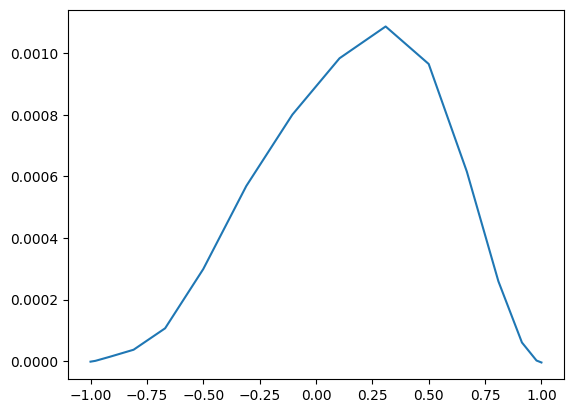

In [135]:
D4 = (D**4)
f = np.exp(y)
u = np.linalg.solve(D4,f)
plt.plot(y,u)

Cond = 550344.9930223873


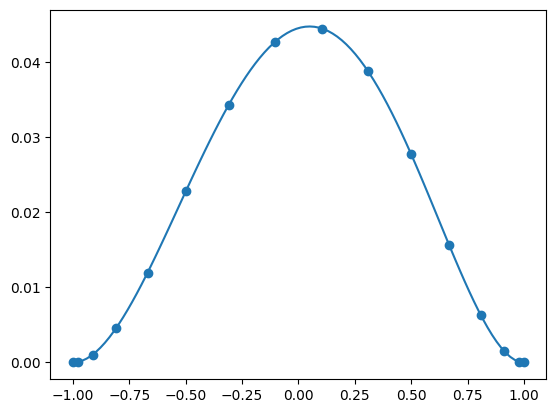

In [136]:
aux_S = np.zeros(M)
aux_S[1:M-1] = 1 / (1 - y[1:M-1]**2)
S = np.diag(aux_S)
D2 = D@D
D3 = D2@D
D4 = D3@D
D4[0,:]=0; D4[:,0]=0; D4[M-1,:]=0; D4[:,M-1]=0
D2[0,:]=0; D2[:,0]=0; D2[M-1,:]=0; D2[:,M-1]=0
D3[0,:]=0; D3[:,0]=0; D3[M-1,:]=0; D3[:,M-1]=0

D4_aux = ((1-y**2)*D4.T).T
D3_aux = 8*(y*((D3).T)).T 
D2_aux = 12*D2
D4_Heinrichs = (D4_aux - D3_aux - D2_aux) * aux_S
D4_Heinrichs = D4_Heinrichs[1:M-1, 1:M-1]
print("Cond =", np.linalg.cond(D4_Heinrichs))
f = np.exp(y[1:M-1])
u = np.zeros(M)
u[1:M-1] = np.linalg.solve(D4_Heinrichs, f)
yy = np.linspace(-1,1,100)
uu = np.poly1d(np.polyfit(y, u, M-1))
plt.scatter(y,u)
plt.plot(yy, uu(yy))